In [6]:
import missingno as msno
from sklearn.model_selection import train_test_split
from scipy import stats
import re
pd.options.display.float_format = '{:.2f}'.format
# 지수 표기법 해제

# 데이터 탐색

In [23]:
raw_data = pd.read_csv("vehicles.csv")

### 결측치 확인

In [3]:
def columns_na_percentage(columns):
    for column in columns:
        print("{} : ".format(column),round(100 -(len(raw_data['{}'.format(column)].dropna()) / len(raw_data)) * 100,2),"%", end='\n')

In [18]:
columns_na_percentage(raw_data.columns)

id :  0.0 %
url :  0.0 %
region :  0.0 %
region_url :  0.0 %
price :  0.0 %
year :  0.3 %
manufacturer :  4.47 %
model :  1.57 %
condition :  45.52 %
cylinders :  39.19 %
fuel :  0.78 %
odometer :  18.12 %
title_status :  0.6 %
transmission :  0.73 %
vin :  40.71 %
drive :  28.29 %
size :  67.12 %
type :  27.77 %
paint_color :  32.32 %
image_url :  0.0 %
description :  0.0 %
county :  100.0 %
state :  0.0 %
lat :  2.02 %
long :  2.02 %


In [5]:
msno.matrix(raw_data)

### 제외 컬럼
- 예측에 도움이 되지 않는 데이터
  - 'url','region_url','vin','image_url','description'
- 위치정보
  - 'lat','long'
 
- 주관적 데이터
  - condition
- 기타
  - 'model' : 카테고리 너무 많음
  - 'county' : 전부 null
  - 'id : 주문별 고유값
  - 'size' : 결측치 50% 이상

In [27]:
raw_data.shape

(509577, 25)

In [28]:
start_df = raw_data[['id','price','year','odometer','drive','fuel','manufacturer','state','title_status','transmission','type','paint_color','cylinders']]

### 결측치 제거

In [29]:
start_df = start_df.dropna(axis=1)
start_df.shape

(509577, 3)

- 고유 ID : id
- 종속변수 : 가격(price)
- 독립변수
  - 카테고리 : 
    - 연료(fuel)
    - 실린더(cylinder)
    - 변속기(transmission)
    - 구동 방식(drive)
    - 차량 크기(size)
    - 색깔(paint_color)
    - 차량 상태(title_status)
    - 차량 타입(type)
    - 제조사(manufacturer)
    - 연식(year)
  - 실수형 
       주행거리(odometer)

### 종속 변수의 특성

- 도메인지식 으로 확인 가능한 아웃라이어
    -  1~9까지 연속되는 숫자를 자릿수에 상관없이 지운다.
    -  한숫자가 반복되는 숫자를 자릿수에 상관없이 지운다.
  -  100만불 초과 삭제
  -  100불 이하 삭제 (0불 포함)

In [10]:
# 100불 이하, 100만불 초과 삭제
df = start_df[(start_df['price'] > 100) & (start_df['price'] <= 1000000) & (start_df['price'] != 0)]
n = ""
for j in range(1,10):
    root_num = float(str(1)*j)
    for i in range(1,10):
        df = df[df['price'] != root_num * i]

for g in range(1,10):
    n =""
    for k in range(g,10):
        k = str(k)
        n += k
        df = df[df['price'] != float(n)]

    for m in range(1,9):
        if n[m:]:
            if n[m:] not in n[m:]:
                df = df[df['price'] != float(n[m:])]

### 독립 변수의 특성

### 연식

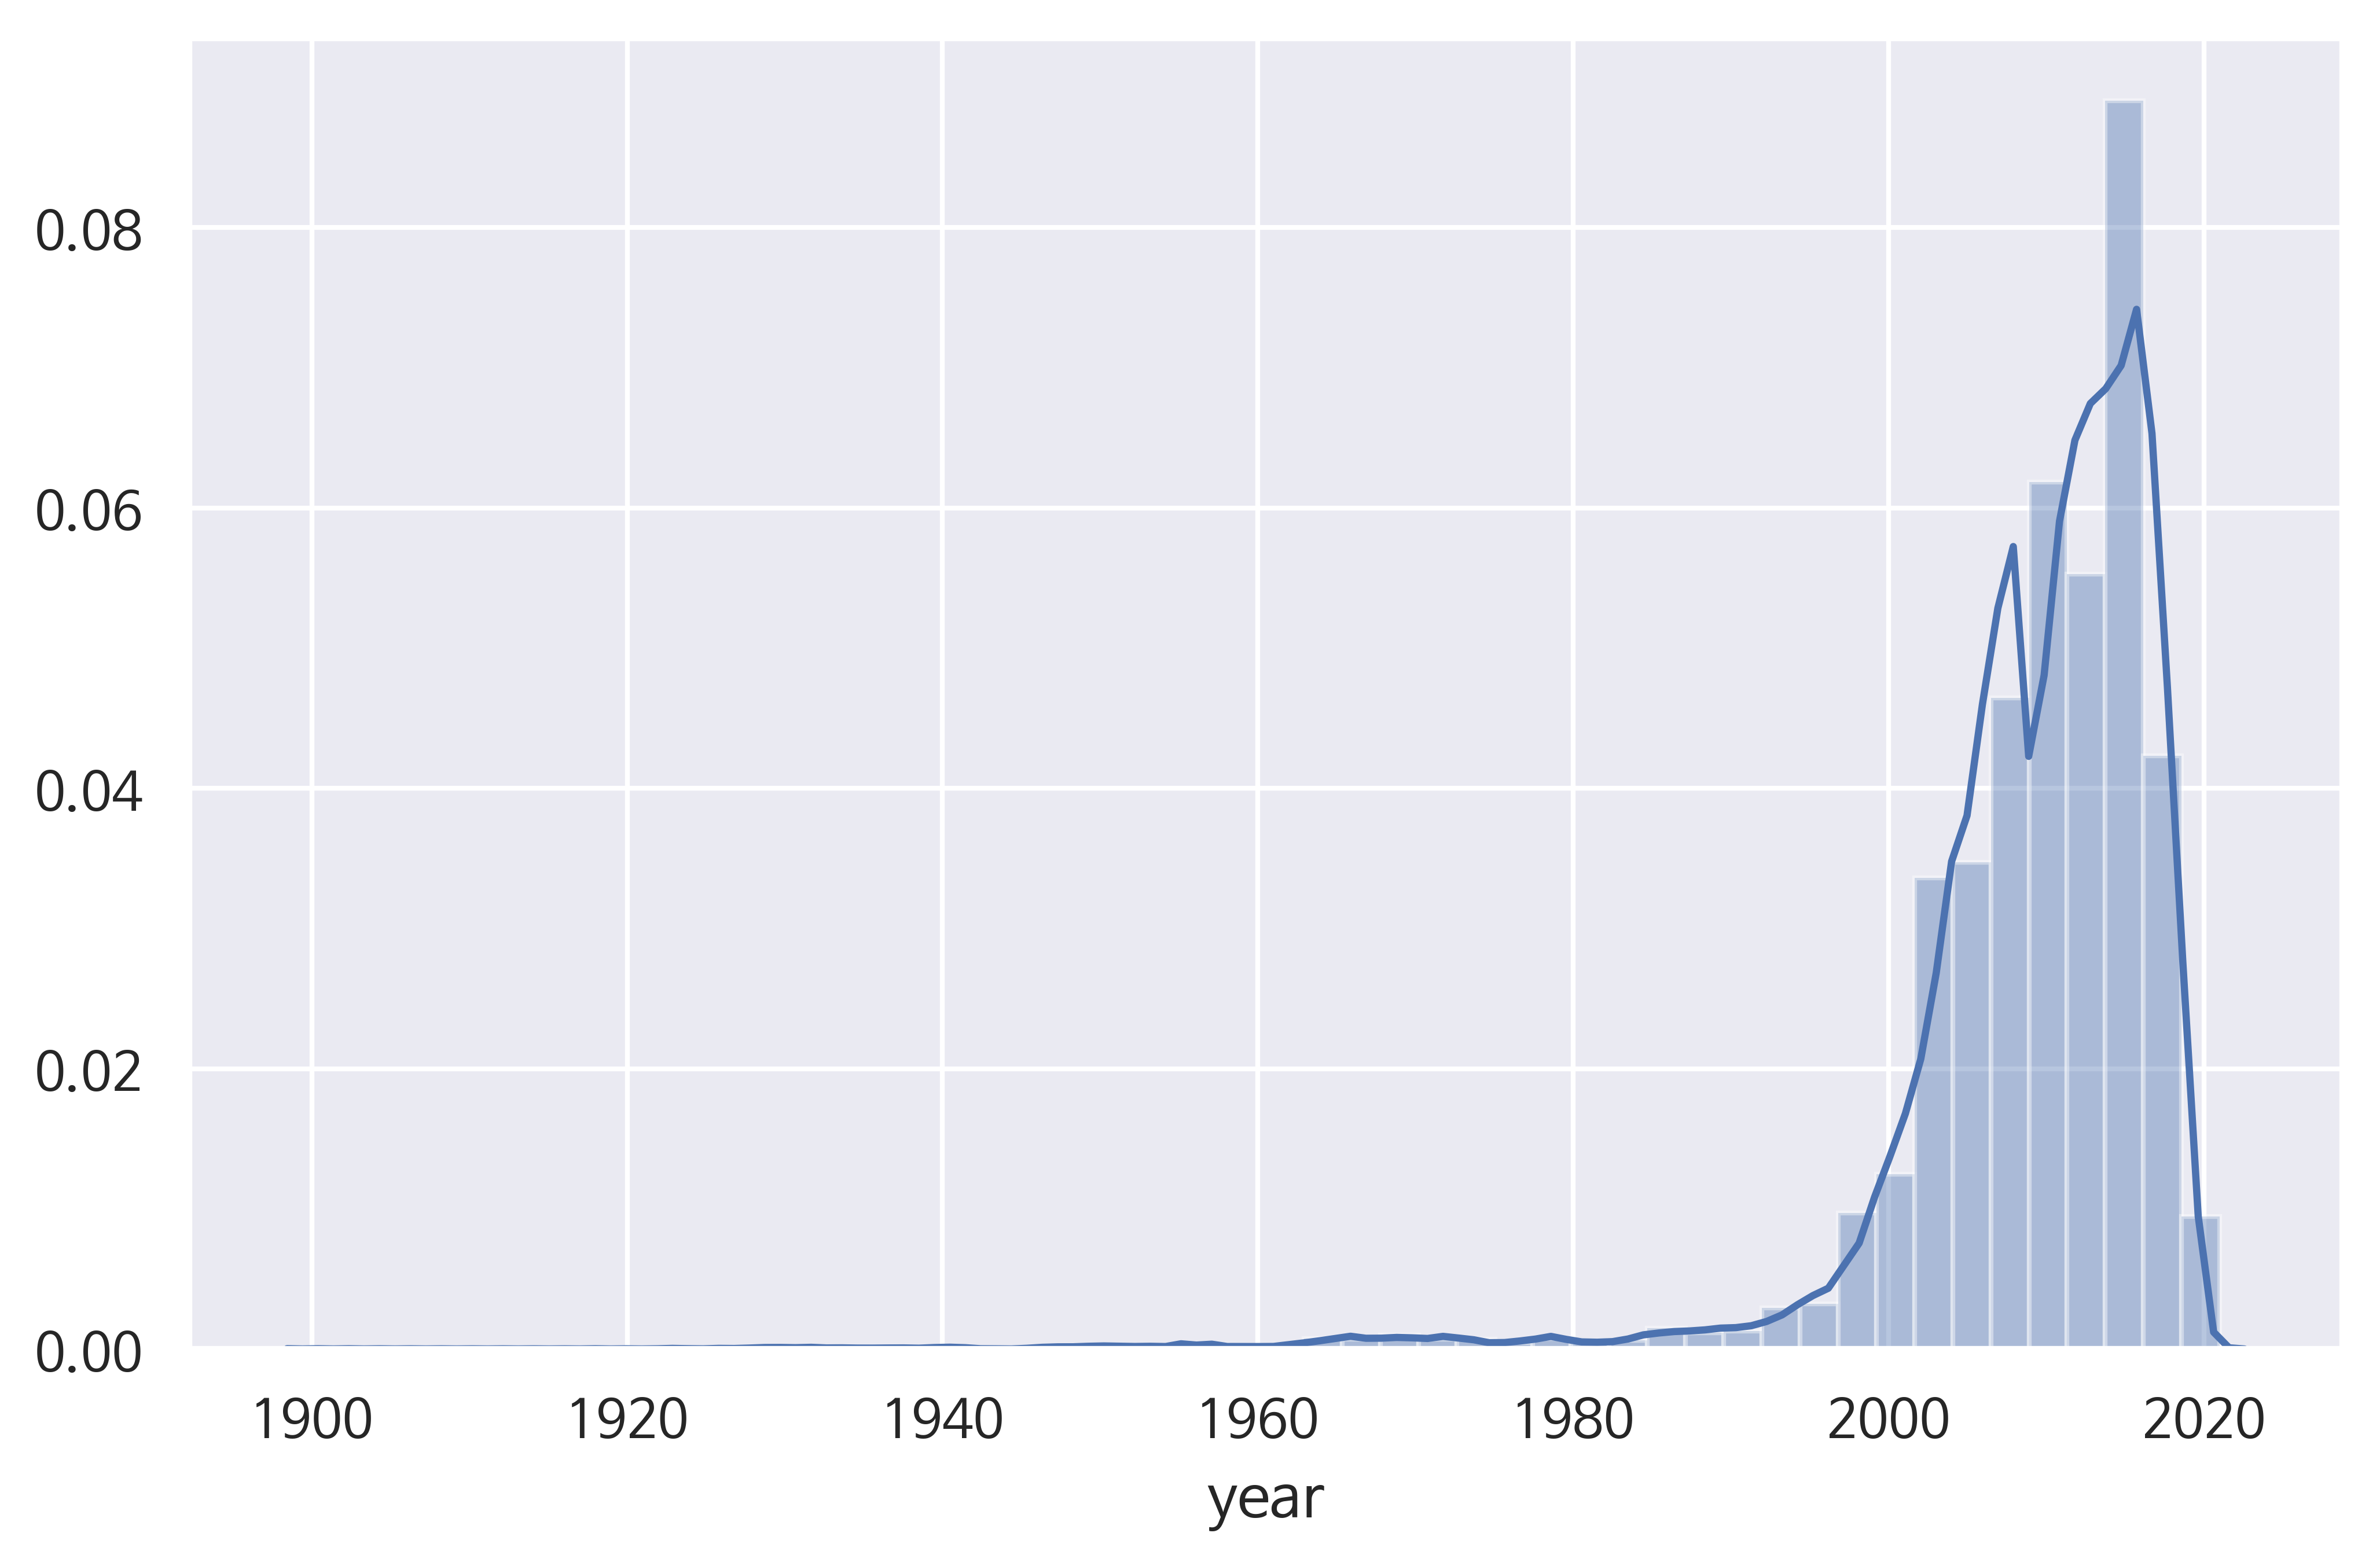

In [13]:
sns.countplot(df[df["year"].notnull()]['year'])
plt.show()